# Lab 4: Visualizing Geographic Data Distributions in the United States

## Introduction

This lab explores how geographic data can be visualized to uncover patterns across the United States. Using data from 2020, the focus is on understanding how certain events or characteristics are distributed spatially, particularly within the 48 contiguous states. By combining maps and statistical visuals, the goal is to make sense of complex data in a clear and meaningful way. This approach helps reveal trends that might not be obvious from raw numbers alone and offers a more intuitive way to interpret geographic information.


### Loading the Geographic Dataset

We begin by importing the necessary libraries for geographic and statistical visualization. The shapefile containing U.S. county subdivision boundaries is loaded using GeoPandas. The %matplotlib inline magic command ensures that plots render directly within the notebook. We then preview the first few rows of the dataset to understand its structure and verify that it loaded correctly.


In [93]:
# Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely.geometry import Point

# plotting inside the notebook
%matplotlib inline
# Load the shapefile
gdf = gpd.read_file('cb_2020_us_cousub_500k.shp')

# Check the first few rows
gdf.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,29,195,22096,00767361,0600000US2919522096,2919522096,Elmwood,Elmwood township,MO,Saline County,Missouri,44,181233131,377337,"POLYGON ((-93.48978 39.06659, -93.48938 39.073..."
1,38,099,45260,01036531,0600000US3809945260,3809945260,Latona,Latona township,ND,Walsh County,North Dakota,44,90848624,2941846,"POLYGON ((-98.16255 48.36954, -98.05746 48.369..."
2,38,017,16100,01036391,0600000US3801716100,3801716100,Cornell,Cornell township,ND,Cass County,North Dakota,44,93440087,0,"POLYGON ((-97.70538 47.04981, -97.70558 47.051..."
3,38,093,22940,01036472,0600000US3809322940,3809322940,Eldridge,Eldridge township,ND,Stutsman County,North Dakota,44,90001176,2572532,"POLYGON ((-98.94567 46.97918, -98.85913 46.979..."
4,38,079,67780,01036243,0600000US3807967780,3807967780,Rolette,Rolette city,ND,Rolette County,North Dakota,25,2609731,0,"POLYGON ((-99.85266 48.66820, -99.83068 48.668..."


### Contiguous United States

This visualization presents a geographic map focused exclusively on the 48 contiguous United States. It uses 2020 cb_2020_us_cousub_500k.shp from the U.S. Census Bureau to draw detailed boundary lines. To maintain geographic focus and clarity, non-continental states and territories such as Alaska, Hawaii, Puerto Rico, Guam, and others have been removed from the map.

The map displays state boundaries across the mainland in a clean and enlarged format. Depending on the shapefile level, it includes smaller geographic divisions such as counties or subdivisions.


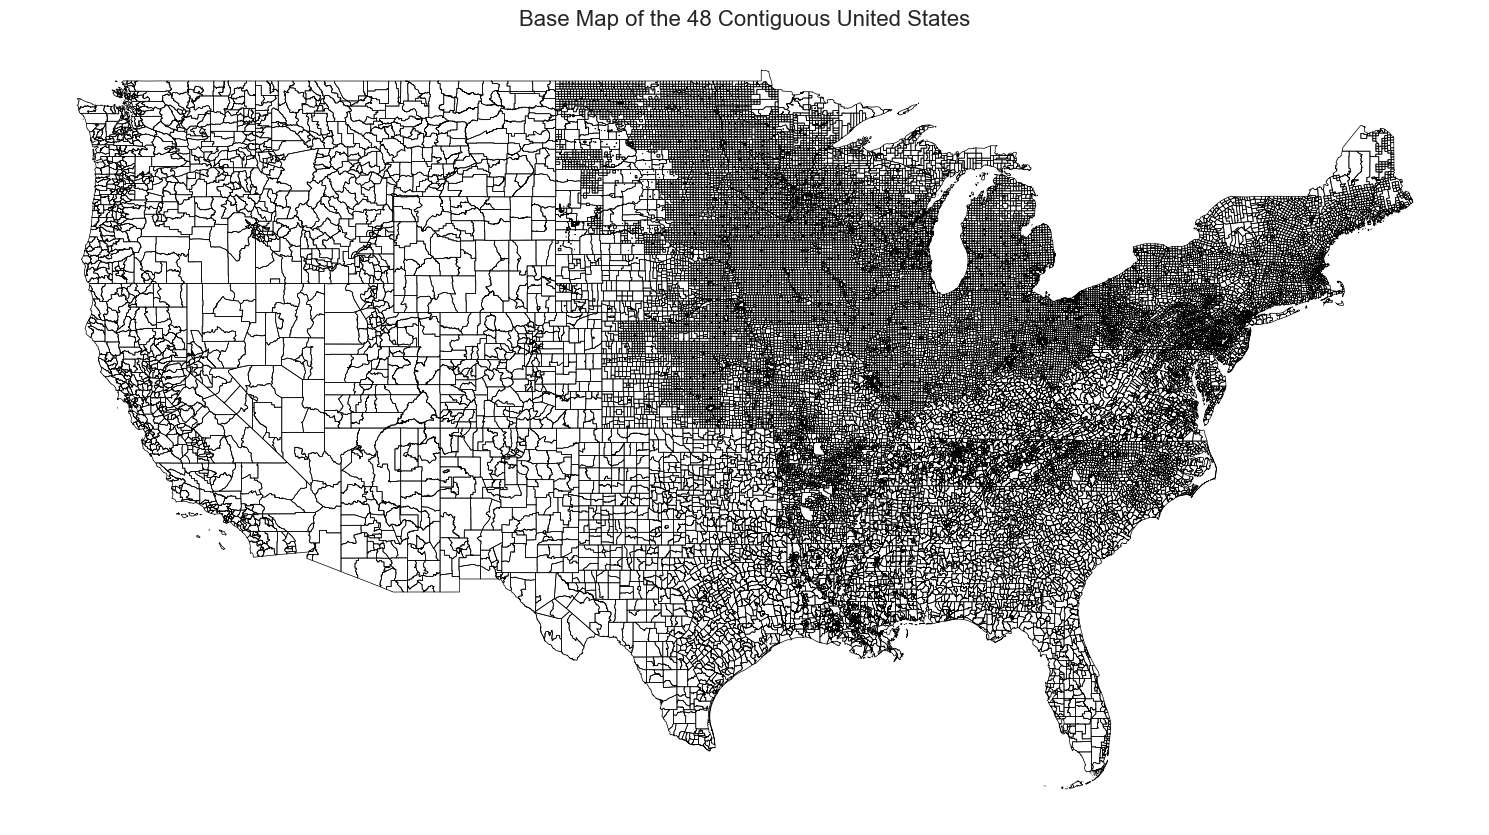

In [96]:
import geopandas as gpd
import matplotlib.pyplot as plt

# List of non-continental state abbreviations to exclude
exclude_states = ['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS']

# Filter out non-mainland states using postal codes
gdf_contiguous = gdf[~gdf['STUSPS'].isin(exclude_states)]

# Plot the filtered base map
fig, ax = plt.subplots(figsize=(15, 10))
gdf_contiguous.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black')
ax.set_title("Base Map of the 48 Contiguous United States", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.savefig("chaker_baloch_ContiguousMap.png")
plt.show()


### 1. Top 20 U.S. States by County Subdivisions

This chart shows the 20 states in the U.S. that have the most county subdivisions, based on data from the 2020 Census. County subdivisions are smaller areas within counties, like townships or districts, that help organize local government. Some states have a lot more of these divisions than others. In this chart, we’re focusing only on the 48 mainland states, so places like Alaska and Hawaii aren’t included. Each bar represents how many subdivisions are in a state, giving us a good visual comparison of how administrative boundaries vary from one place to another.


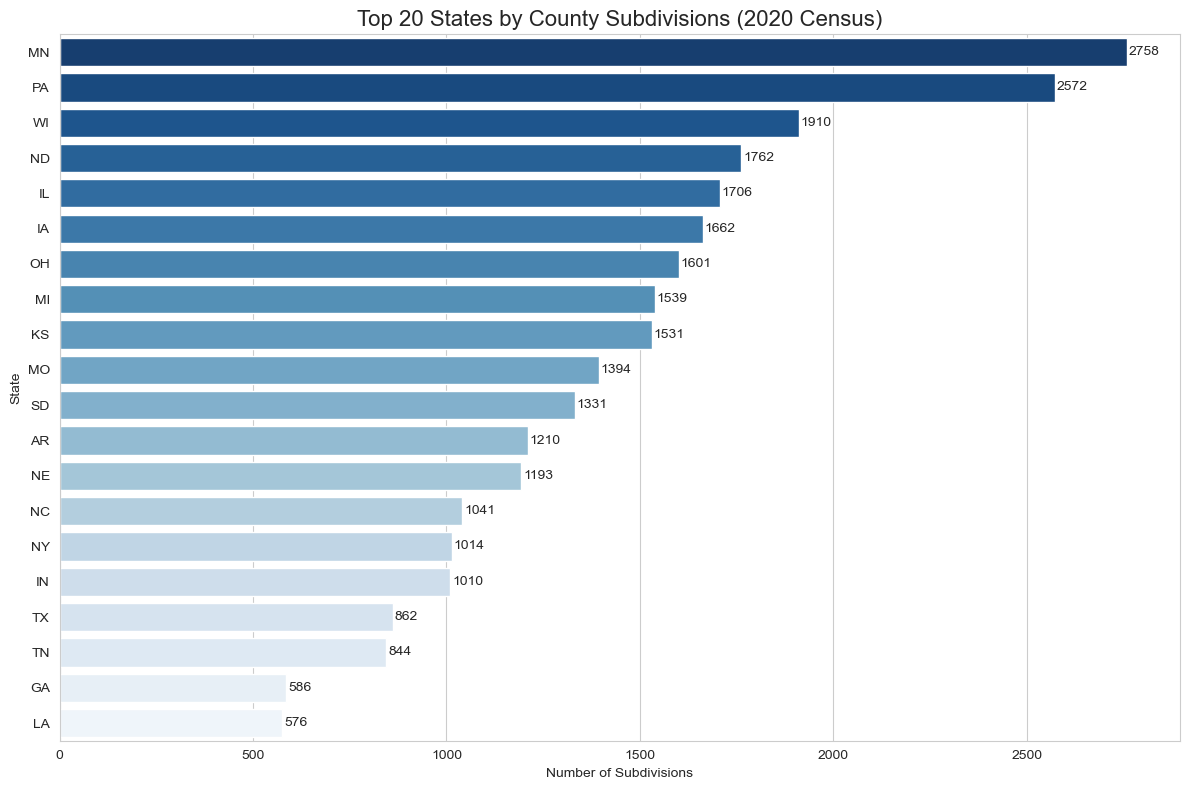

In [99]:

# Get top 20 states by subdivision count
subdiv_count = gdf_contiguous['STUSPS'].value_counts().head(20).reset_index()
subdiv_count.columns = ['State', 'Subdivision Count']

# Set figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot horizontal bar chart
sns.barplot(
    data=subdiv_count,
    y='State',
    x='Subdivision Count',
    palette='Blues_r'
)

# Add title and labels
plt.title("Top 20 States by County Subdivisions (2020 Census)", fontsize=16)
plt.xlabel("Number of Subdivisions")
plt.ylabel("State")

# Add count annotations on each bar
for index, value in enumerate(subdiv_count['Subdivision Count']):
    plt.text(value + 5, index, str(value), va='center', fontsize=10)

# Save and display
plt.tight_layout()
plt.savefig("Chaker_Baloch_Top20States_SubdivCount.png")
plt.show()


###  Insight

Minnesota has the highest number of county subdivisions above 2,500, followed closely by Pennsylvania and Wisconsin. Most of the top-ranking states are in the Midwest and Northeast, where townships and local administrative units are more common. In contrast, states like Georgia and Louisiana, though still in the top 20, have far fewer subdivisions, reflecting different approaches to local governance and land management.


### 2. Choropleth Map of Land Area by County Subdivision (2020)

This map shows the land area of each county subdivision in the 48 contiguous U.S. states. Subdivisions are colored from light to dark green based on their land size, lighter shades represent smaller areas, and darker shades represent larger ones. This gives a clear picture of how land is distributed across the country at a local administrative level.


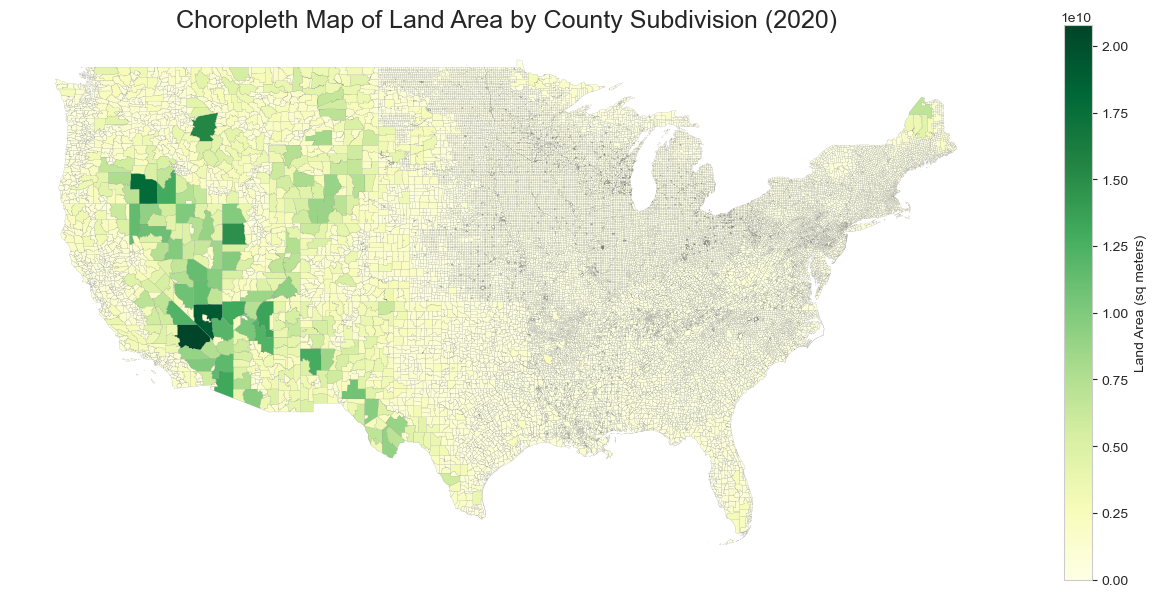

In [103]:


# Set up figure
fig, ax = plt.subplots(figsize=(16, 12))

# Plot the choropleth based on ALAND (land area)
gdf_contiguous.plot(
    column='ALAND',
    cmap='YlGn',
    linewidth=0.1,
    edgecolor='gray',
    legend=True,
    legend_kwds={'label': "Land Area (sq meters)", 'shrink': 0.6},
    ax=ax
)

# Title and visual tweaks
ax.set_title("Choropleth Map of Land Area by County Subdivision (2020)", fontsize=18)
ax.axis('off')

# Save and display
plt.savefig("Chaker_Baloch_Choropleth_LandArea.png")
plt.show()


### Insight

We can see that most of the smaller subdivisions are located in the Midwest and Northeast, where local boundaries are more detailed and compact. In contrast, the West features much larger subdivisions, especially in states like Nevada, Arizona, and Montana. This reflects regional differences in population density and how land was divided historically, more densely settled regions tend to have smaller, more numerous administrative areas.

### 3. Boxplot of Land vs Water Area in County Subdivisions

This boxplot compares how land and water areas are distributed across all county subdivisions in the 48 contiguous U.S. states. The data is plotted on a logarithmic scale to handle the extreme differences in area sizes. The left box represents land area, while the right represents water area. Both show the median, interquartile range, and a large number of outliers. This helps us compare typical subdivision sizes as well as highlight how much they vary.


/Users/chakerbaloch/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


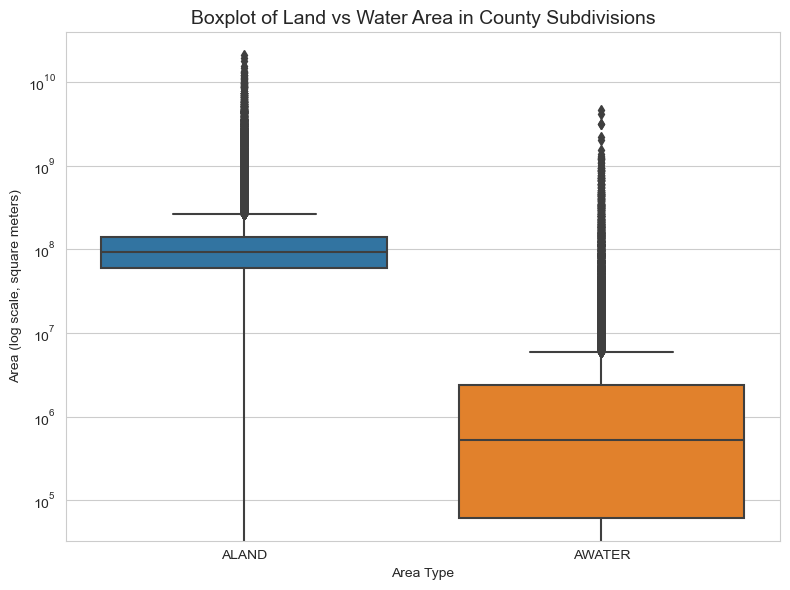

In [109]:

# Calculate total area
gdf_contiguous['Total_Area'] = gdf_contiguous['ALAND'] + gdf_contiguous['AWATER']

# Prepare data for boxplot comparison
df_melted = gdf_contiguous[['ALAND', 'AWATER']].melt(var_name='Type', value_name='Area')

# Create boxplot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.boxplot(x='Type', y='Area', data=df_melted)

# Use log scale on the y-axis to handle skewed values
plt.yscale('log')

# Add titles and labels
plt.title("Boxplot of Land vs Water Area in County Subdivisions", fontsize=14)
plt.xlabel("Area Type")
plt.ylabel("Area (log scale, square meters)")

# Save and display the plot
plt.tight_layout()
plt.savefig("Chaker_Baloch_LandWater_Boxplot.png")
plt.show()



###  Insight

Most subdivisions have far more land than water, as shown by the higher median and tighter concentration of land area values around the center. However, there are many outliers with extremely large land areas, likely in rural western states. In contrast, water areas tend to be smaller overall but more spread out, with a few subdivisions, possibly along the Great Lakes or coastlines, showing very large water areas. This kind of distribution is important for environmental planning, resource management, and understanding geographic diversity within counties.

### 4. States with Largest Average Subdivision Land Area

This bar chart shows the ten states with the largest average land area per county subdivision. Each bar represents the mean size of subdivisions within that state, calculated using land area only. The chart gives a clear comparison of which states tend to have fewer but larger subdivisions.

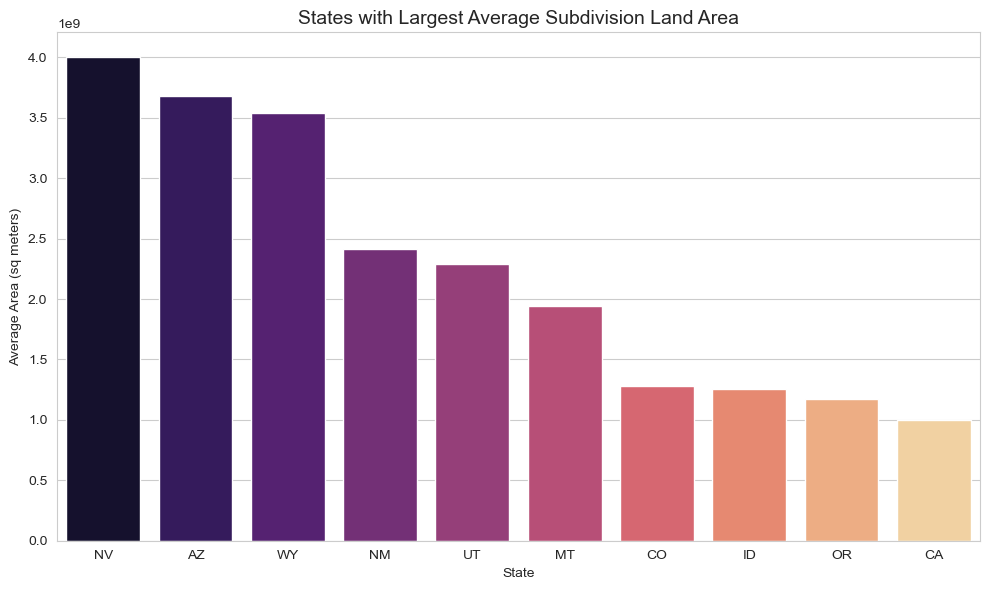

In [113]:
# Calculate average land area per subdivision by state
avg_area = gdf_contiguous.groupby('STUSPS')['ALAND'].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame
avg_area_df = avg_area.reset_index()
avg_area_df.columns = ['State', 'Average Land Area']

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=avg_area_df, x='State', y='Average Land Area', palette='magma')

# Titles and labels
plt.title("States with Largest Average Subdivision Land Area", fontsize=14)
plt.ylabel("Average Area (sq meters)")
plt.xlabel("State")

# Save and show
plt.tight_layout()
plt.savefig("Chaker_Baloch_AvgLandArea.png")
plt.show()


### Insight

The states with the biggest average subdivision sizes are mostly in the West, including Nevada, Arizona, and Utah. These states have fewer subdivisions overall, but each one covers a large amount of land. This makes sense because these areas are more rural and less densely populated. In contrast, states in the East usually have many smaller subdivisions. The chart shows how land use and population patterns shape how states are divided.


### 5. Line Graph: Subdivision Count per State (Top 20 States)

This line graph shows the number of county subdivisions in the top 20 states with the highest counts. Each point on the line represents a state, and the height indicates how many subdivisions it has. The data is sorted alphabetically to make the line smoother and easier to read.


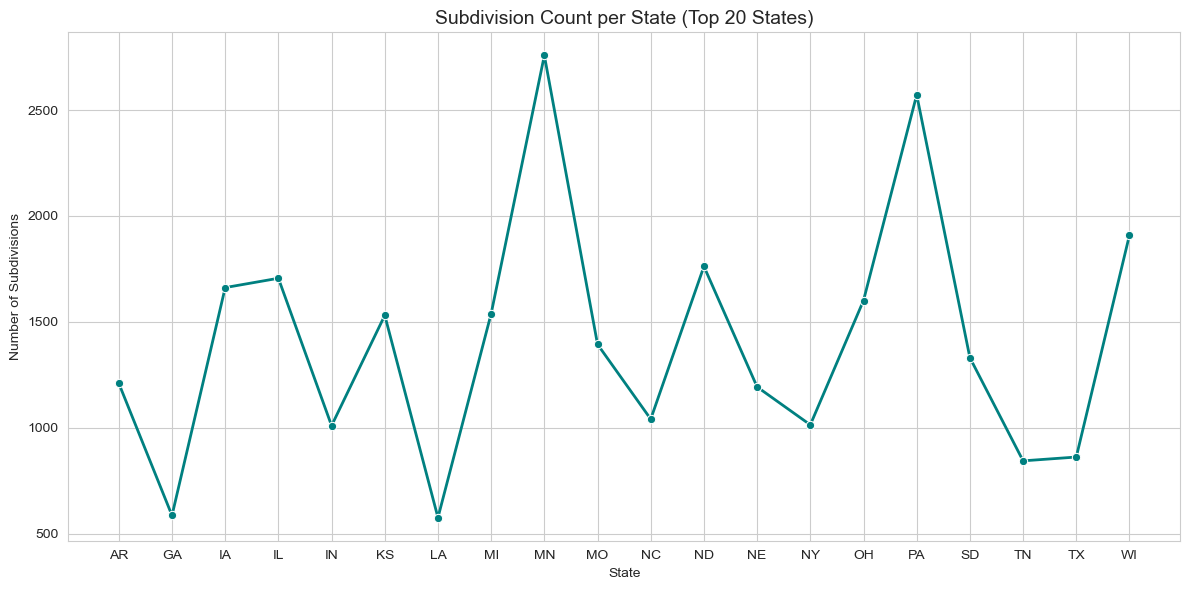

In [117]:
# Count subdivisions per state
subdiv_counts = gdf_contiguous['STUSPS'].value_counts().sort_values(ascending=False).head(20)
subdiv_counts = subdiv_counts.sort_index()  # Sort alphabetically for line plot

# Convert to DataFrame
line_df = subdiv_counts.reset_index()
line_df.columns = ['State', 'Subdivision Count']

# Line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=line_df, x='State', y='Subdivision Count', marker='o', linewidth=2, color='teal')
plt.title("Subdivision Count per State (Top 20 States)", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Subdivisions")
plt.grid(True)
plt.tight_layout()
plt.savefig("Chaker_Baloch_LineGraph_SubdivCount.png")
plt.show()



### Insight

States like Minnesota and Pennsylvania stand out with a very high number of subdivisions, while others like Georgia and Louisiana have fewer in this top 20 group. The gradual rise and fall in the line shows how subdivision counts vary across different states, revealing a mix of administrative styles and historical land planning.

### 6. Histogram: Distribution of Total Area Across Subdivisions

This histogram shows how total area (land plus water) is distributed across all county subdivisions in the U.S. The x-axis uses a logarithmic scale because area sizes vary widely. The curve on top is a smoothed estimate (KDE) that helps show the shape of the distribution.


/Users/chakerbaloch/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


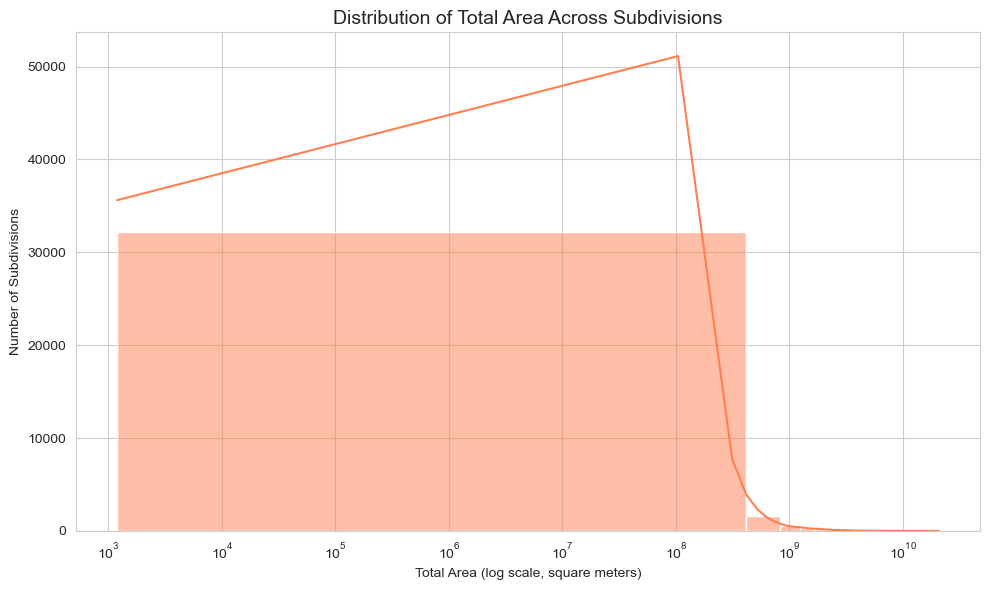

In [121]:
# Create a new column for total area (land + water)
gdf_contiguous['Total_Area'] = gdf_contiguous['ALAND'] + gdf_contiguous['AWATER']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(gdf_contiguous['Total_Area'], bins=50, color='coral', kde=True)
plt.xscale('log')
plt.title("Distribution of Total Area Across Subdivisions", fontsize=14)
plt.xlabel("Total Area (log scale, square meters)")
plt.ylabel("Number of Subdivisions")
plt.tight_layout()
plt.savefig("Chaker_Baloch_Histogram_TotalArea.png")
plt.show()


### Insight

Most subdivisions have relatively small total areas, but there are a few extremely large ones, especially in rural western states. The log scale reveals this uneven spread, with many subdivisions clustered in the smaller area range and a long tail stretching to the right.